# Capstone Project - League of Legends Champion Recommender

> Author: Ryan Yong

**Summary:**   
- Develop a Recommender System for recommending champions to users based on their account mastery points.
- Training data: Account & Champion Data

There are a total of 7 notebooks for this project:  
 1. `01a_data_scrape.ipynb`   
 2. `01b_wiki_scrape_fail.ipynb`   
 3. `02_champion_dataset_EDA.ipynb`
 4. `03_account_dataset_EDA.ipynb`
 5. `04_intial_recommender_system.ipynb`
 6. `05_final_hybrid_system.ipynb`
 7. `06_implementation.ipynb`

---
**This Notebook**
- performs EDA on the `account_mastery_data.csv` & `accounts_dataset.csv` files
- performs feature engineering to combine the two and output a single file `account_rank_mastery_dataset.csv` 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [23]:
df = pd.read_csv('../data/account_mastery_dataset.csv',index_col=False)
account_df = pd.read_csv('../data/accounts_dataset.csv',index_col=False)

`rank_mapping` was made to convert account ranks into a numerical category as the name of the rank itself. For reference, the higher than number the higher the rank.

In [24]:
rank_mapping = {
    None: 0,
    'IRON': 1,
    'BRONZE': 2,
    'SILVER': 3,
    'GOLD': 4,
    'PLATINUM': 5,
    'DIAMOND': 6,
    'EMERALD': 7,
    'MASTER': 8,
    'GRANDMASTER': 9,
    'CHALLENGER': 10
}


In [25]:
df['rank'] = account_df['Rank'].map(rank_mapping)

# Sort columns alphabetically starting from the 2nd column
df = df.reindex(sorted(df.columns), axis=1)

# Move the 'rank' column to the front
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('rank')))
df = df.reindex(columns=cols)

In [26]:
df.head()

rank    Aatrox     Ahri    Akali    Akshan  Alistar    Amumu   Anivia  \
0    10    3253.0      0.0      0.0       0.0      0.0      0.0      0.0   
1    10   78536.0  95438.0  47494.0    9391.0  23242.0  24820.0   2932.0   
2    10   58213.0   3055.0  49768.0  163123.0   8625.0   4000.0   7938.0   
3    10    1218.0   2112.0   1742.0       0.0   3244.0   4282.0   1212.0   
4    10  430765.0  28637.0  57778.0       0.0  17666.0  12069.0  26087.0   

      Annie  Aphelios      Ashe  Aurelion Sol     Azir     Bard  Bel'Veth  \
0       0.0       0.0       0.0           0.0      0.0      0.0       0.0   
1  102068.0  135475.0  103526.0        5077.0  21179.0  14260.0     165.0   
2    3409.0   13233.0    6039.0       14463.0  19801.0   3983.0       0.0   
3    1467.0   36355.0   16297.0           0.0      0.0    273.0       0.0   
4   19943.0   20768.0   66623.0        8305.0   7863.0  10802.0       0.0   

   Blitzcrank    Brand    Braum  Briar   Caitlyn   Camille  Cassiopeia  \
0         0.0      0.0      0.0    0.0       0.0       0.0         0.0   
1     72825.0  20315.0  23163.0    0.0  197115.0  120748.0     27261.0   
2     55679.0  12583.0      0.0    0.0  114667.0  108146.0     15890.0   
3      1721.0   1027.0    771.0    0.0   12661.0    7380.0      4180.0   
4     98619.0  14997.0  15637.0    0.0   88522.0   49933.0      5550.0   

   Cho'Gath    Corki    Darius    Diana  Dr. Mundo    Draven      Ekko  \
0       0.0      0.0    7909.0      0.0        0.0       0.0    1620.0   
1    9838.0   8029.0   58001.0  40500.0     4479.0  741222.0   55192.0   
2   17476.0   7107.0   22225.0   9325.0     8505.0  221838.0  117358.0   
3       0.0      0.0    3224.0  18048.0     3064.0    5159.0   19799.0   
4   38398.0  13899.0  166917.0   5833.0    12638.0   70848.0   25930.0   

     Elise  Evelynn    Ezreal  Fiddlesticks     Fiora     Fizz    Galio  \
0  51478.0      0.0    1142.0           0.0       0.0      0.0      0.0   
1  19696.0  48476.0  592043.0       26997.0   76494.0  32387.0  18639.0   
2  22517.0  19383.0   46981.0        4269.0  105244.0  27665.0   6252.0   
3   9356.0      0.0   24751.0         648.0    4396.0   1047.0    624.0   
4  26672.0  21235.0   79114.0       16548.0   21005.0  21490.0   7322.0   

   Gangplank    Garen     Gnar   Gragas   Graves    Gwen  Hecarim  \
0        0.0      0.0      0.0      0.0   2629.0  1853.0      0.0   
1    53324.0  24742.0  42443.0  37766.0  84864.0  6417.0  30413.0   
2    79150.0  15539.0   1958.0  19937.0  90408.0  8014.0  30969.0   
3     2694.0    341.0      0.0    897.0  58448.0  9380.0   2656.0   
4    66862.0  79291.0  21249.0  68295.0  15432.0  6521.0  15858.0   

   Heimerdinger    Hwei   Illaoi    Irelia  Ivern     Janna  Jarvan IV  \
0           0.0     0.0      0.0       0.0    0.0       0.0        0.0   
1       18064.0  1140.0    847.0  106033.0  635.0  136642.0    36047.0   
2        1565.0     0.0   1259.0   83637.0    0.0    2562.0    27250.0   
3         230.0  2200.0    134.0   24750.0    0.0     152.0    35953.0   
4       17151.0     0.0  61141.0   11523.0  935.0   22893.0    42195.0   

        Jax    Jayce      Jhin      Jinx   K'Sante    Kai'Sa   Kalista  \
0       0.0      0.0     920.0       0.0       0.0     106.0       0.0   
1   25134.0  63179.0  227294.0  314765.0     181.0  301951.0  104240.0   
2  161338.0  26977.0  122035.0   61557.0   10678.0  162875.0   14943.0   
3   15069.0   1035.0   30420.0   44080.0    1417.0   29875.0    3017.0   
4  199815.0  15843.0   49149.0   65894.0  251967.0   52212.0   18051.0   

      Karma  Karthus  Kassadin  Katarina    Kayle     Kayn   Kennen   Kha'Zix  \
0    1119.0    615.0       0.0       0.0      0.0      0.0   2237.0     918.0   
1  111944.0  31301.0   37939.0   82707.0  29148.0  55187.0  13436.0   95992.0   
2     375.0  17724.0   81323.0  265722.0  15012.0  80166.0   5084.0  113607.0   
3       0.0   6675.0    2912.0   12142.0      0.0  24540.0    664.0   40058.0   
4   10073.0  22612.0   25164.0  

In [27]:
df.shape

(5392, 168)

In [28]:
df['rank'].value_counts()

rank
6     820
5     820
4     820
3     820
2     820
1     820
8     322
9     100
10     50
Name: count, dtype: int64

In [29]:
df.to_csv('../data/account_rank_mastery_dataset.csv',index=False)

In [30]:
account_rank_mastery_df = df

# Display the first few rows and the summary of the dataset
account_rank_mastery_df.head(), account_rank_mastery_df.info(), account_rank_mastery_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Columns: 168 entries, rank to Zyra
dtypes: float64(167), int64(1)
memory usage: 6.9 MB


(   rank    Aatrox     Ahri    Akali    Akshan  Alistar    Amumu   Anivia  \
 0    10    3253.0      0.0      0.0       0.0      0.0      0.0      0.0   
 1    10   78536.0  95438.0  47494.0    9391.0  23242.0  24820.0   2932.0   
 2    10   58213.0   3055.0  49768.0  163123.0   8625.0   4000.0   7938.0   
 3    10    1218.0   2112.0   1742.0       0.0   3244.0   4282.0   1212.0   
 4    10  430765.0  28637.0  57778.0       0.0  17666.0  12069.0  26087.0   
 
       Annie  Aphelios      Ashe  Aurelion Sol     Azir     Bard  Bel'Veth  \
 0       0.0       0.0       0.0           0.0      0.0      0.0       0.0   
 1  102068.0  135475.0  103526.0        5077.0  21179.0  14260.0     165.0   
 2    3409.0   13233.0    6039.0       14463.0  19801.0   3983.0       0.0   
 3    1467.0   36355.0   16297.0           0.0      0.0    273.0       0.0   
 4   19943.0   20768.0   66623.0        8305.0   7863.0  10802.0       0.0   
 
    Blitzcrank    Brand    Braum  Briar   Caitlyn   Camille  Cassi

Using a few champions as a representation of all champions, The boxplot is used to measure the median and also highlight any outliers in the dataset. From below it can be seen that the outliers skew very far to the right. This is because of the general concept where by players tend to play champions that they enjoy more, which in turns makes them better players of said champions. This cycle results in a stark difference between a player who has intentionally and intensively played the champion compared to the rest of the player base who has on ocassion played or in fact have not played the champion before.

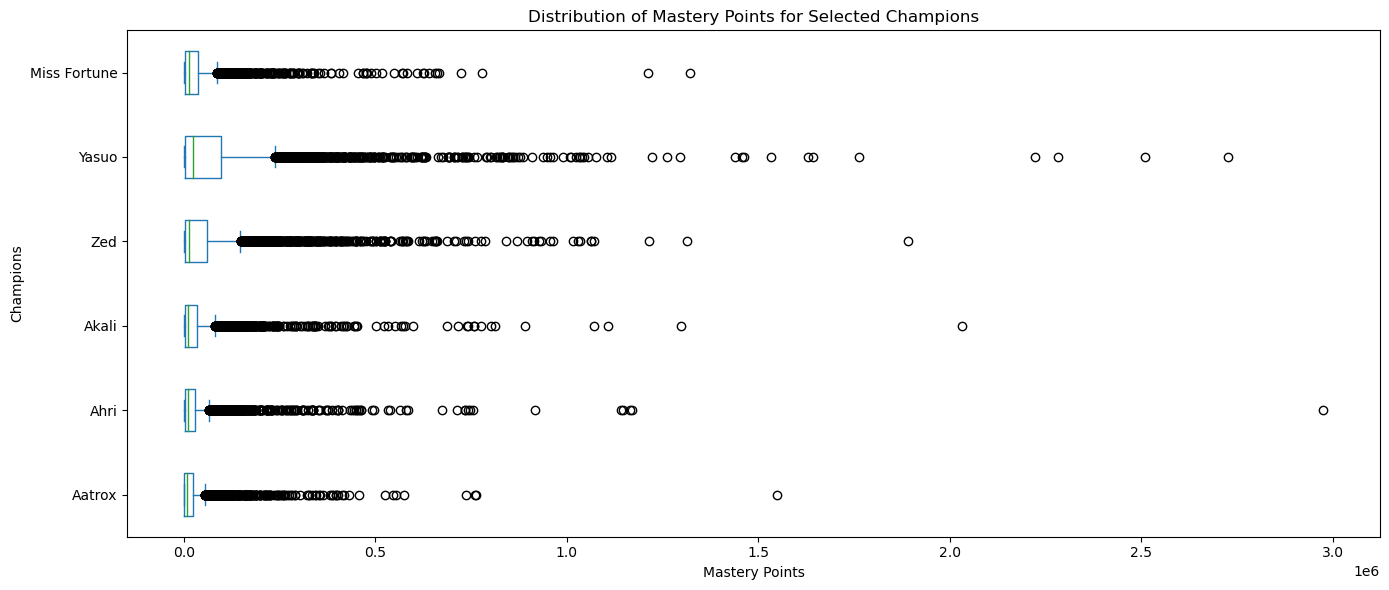

In [31]:
# Creating a figure to hold the visualization
fig, ax = plt.subplots(figsize=(14, 6))

# Box plot for a subset of champions to see mastery point distributions
sample_champions = ['Aatrox', 'Ahri', 'Akali', 'Zed', 'Yasuo', 'Miss Fortune']
account_rank_mastery_df[sample_champions].plot(kind='box', ax=ax, vert=False)
ax.set_title('Distribution of Mastery Points for Selected Champions')
ax.set_xlabel('Mastery Points')
ax.set_ylabel('Champions')

plt.tight_layout()
plt.show()


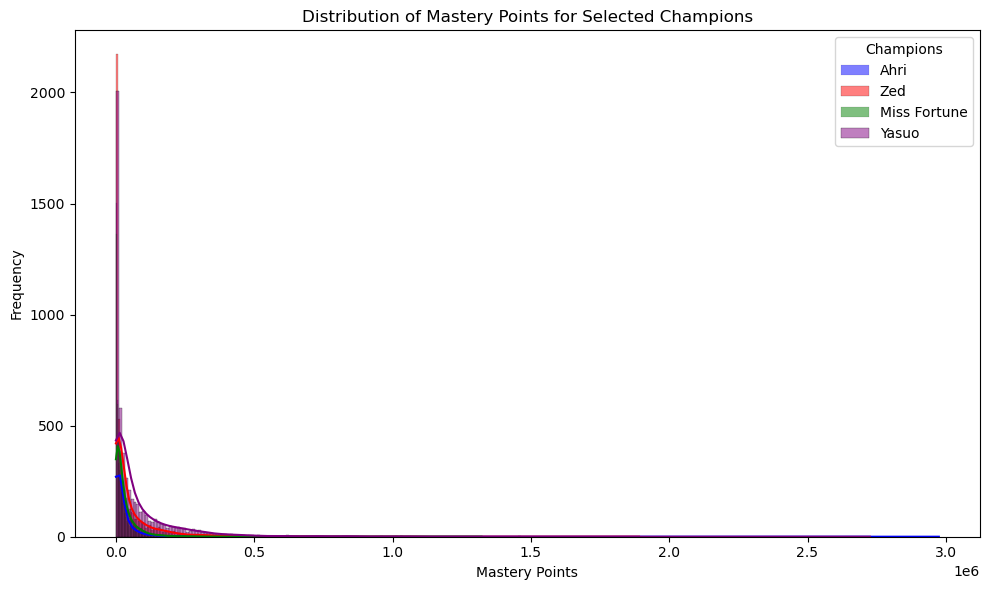

In [32]:
# Creating a figure to hold the visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for Ahri
sns.histplot(account_rank_mastery_df['Ahri'], kde=True, ax=ax, color='blue', label='Ahri')
# Histogram for Zed
sns.histplot(account_rank_mastery_df['Zed'], kde=True, ax=ax, color='red', label='Zed')
# Histogram for Miss Fortune
sns.histplot(account_rank_mastery_df['Miss Fortune'], kde=True, ax=ax, color='green', label='Miss Fortune')
# Histogram for Yasuo
sns.histplot(account_rank_mastery_df['Yasuo'], kde=True, ax=ax, color='purple', label='Yasuo')

# Adding title and labels
ax.set_title('Distribution of Mastery Points for Selected Champions')
ax.set_xlabel('Mastery Points')
ax.set_ylabel('Frequency')

# Adding the legend
ax.legend(title='Champions')

plt.tight_layout()
plt.show()


It's too difficult to view this graph as it's too small, thus to zoom in i adjusted the X axis 

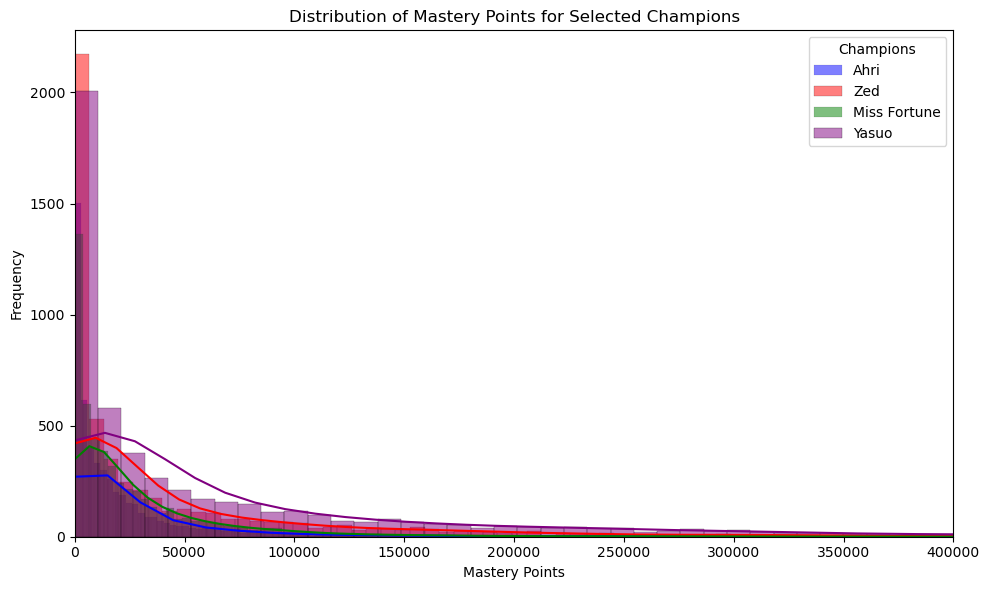

In [33]:
# Creating a figure to hold the visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for Ahri
sns.histplot(account_rank_mastery_df['Ahri'], kde=True, ax=ax, color='blue', label='Ahri')
# Histogram for Zed
sns.histplot(account_rank_mastery_df['Zed'], kde=True, ax=ax, color='red', label='Zed')
# Histogram for Miss Fortune
sns.histplot(account_rank_mastery_df['Miss Fortune'], kde=True, ax=ax, color='green', label='Miss Fortune')
# Histogram for Yasuo
sns.histplot(account_rank_mastery_df['Yasuo'], kde=True, ax=ax, color='purple', label='Yasuo')

# Adding title and labels
ax.set_title('Distribution of Mastery Points for Selected Champions')
ax.set_xlabel('Mastery Points')
ax.set_ylabel('Frequency')

# Set the x-axis limit
ax.set_xlim(0, 0.4e6)  # Setting x-axis limit to focus up to 0.4e6

# Adding the legend
ax.legend(title='Champions')

plt.tight_layout()
plt.show()


From this we can tell that this graph is not normally distributed. However, the scale is also extremely large. From my domain knowledge, I suspect that this might be a logarithmic scale. The reasoning behind it is that as a user plays the champion more often, they tend to eventually enjoy it, making them better and also more likely to play more once again. This results in a large amount of players who are extremely interested in different but singular champions. In order to prove the theory, an logaritmic scale will be used on the x_axis for re-assessment.

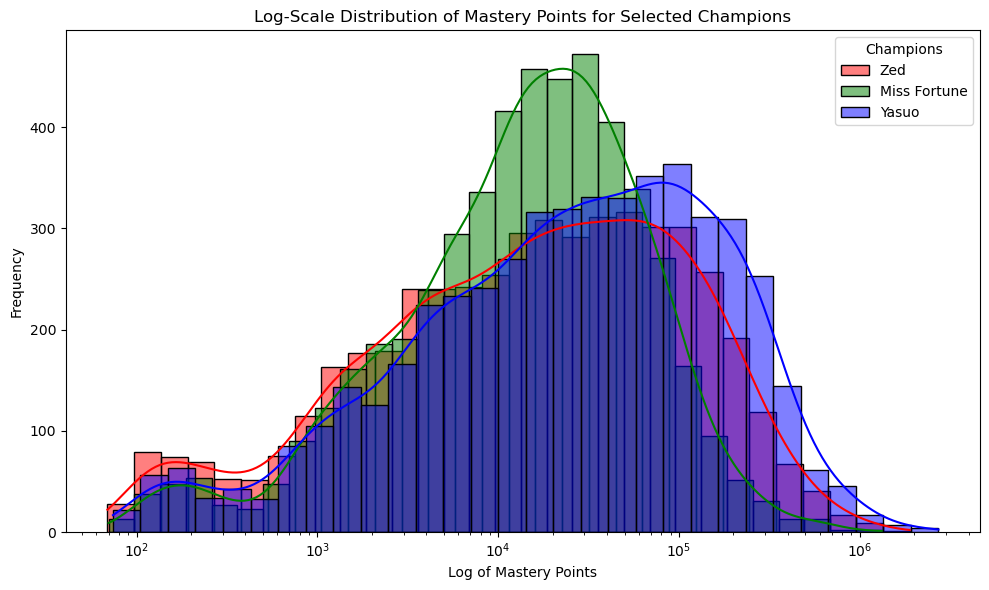

In [34]:
# Select additional champions and remove zero values for the analysis
zed_mastery = account_rank_mastery_df['Zed'][account_rank_mastery_df['Zed'] > 0]
miss_fortune_mastery = account_rank_mastery_df['Miss Fortune'][account_rank_mastery_df['Miss Fortune'] > 0]
yasuo_mastery = account_rank_mastery_df['Yasuo'][account_rank_mastery_df['Yasuo'] > 0]

# Creating a figure to hold the visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for Zed with log scale
sns.histplot(zed_mastery, kde=True, log_scale=True, ax=ax, color='red', label='Zed', bins=30)
# Histogram for Miss Fortune with log scale
sns.histplot(miss_fortune_mastery, kde=True, log_scale=True, ax=ax, color='green', label='Miss Fortune', bins=30)
# Histogram for Yasuo with log scale
sns.histplot(yasuo_mastery, kde=True, log_scale=True, ax=ax, color='blue', label='Yasuo', bins=30)

# Adding title and labels
ax.set_title('Log-Scale Distribution of Mastery Points for Selected Champions')
ax.set_xlabel('Log of Mastery Points')
ax.set_ylabel('Frequency')

# Adding the legend
ax.legend(title='Champions')

plt.tight_layout()
plt.show()


In [35]:
# Step 1: Calculate Total Mastery Score for each user
account_rank_mastery_df['Total Mastery Score'] = account_rank_mastery_df.drop(columns=['rank']).sum(axis=1)

champion_columns = account_rank_mastery_df.columns[1:-1] 

# Calculating the percentage DataFrame
percentage_df = account_rank_mastery_df[champion_columns].div(account_rank_mastery_df['Total Mastery Score'], axis=0) * 100

# Naming the new columns with (%) suffix
percentage_df.columns = [col + ' (%)' for col in percentage_df.columns]

# Concatenating the original DataFrame with the new percentage DataFrame
account_rank_mastery_df = pd.concat([account_rank_mastery_df, percentage_df], axis=1)

# Display the updated DataFrame with new percentage columns
account_rank_mastery_df[['rank', 'Total Mastery Score'] + list(champion_columns[:5]) + list(champion_columns[:5] + ' (%)')].head()


rank  Total Mastery Score    Aatrox     Ahri    Akali    Akshan  Alistar  \
0    10             250020.0    3253.0      0.0      0.0       0.0      0.0   
1    10           10500678.0   78536.0  95438.0  47494.0    9391.0  23242.0   
2    10            6438791.0   58213.0   3055.0  49768.0  163123.0   8625.0   
3    10            1582645.0    1218.0   2112.0   1742.0       0.0   3244.0   
4    10            7366705.0  430765.0  28637.0  57778.0       0.0  17666.0   

   Aatrox (%)  Ahri (%)  Akali (%)  Akshan (%)  Alistar (%)  
0    1.301096  0.000000   0.000000    0.000000     0.000000  
1    0.747914  0.908875   0.452295    0.089432     0.221338  
2    0.904098  0.047447   0.772940    2.533441     0.133954  
3    0.076960  0.133447   0.110069    0.000000     0.204973  
4    5.847458  0.388736   0.784313    0.000000     0.239809

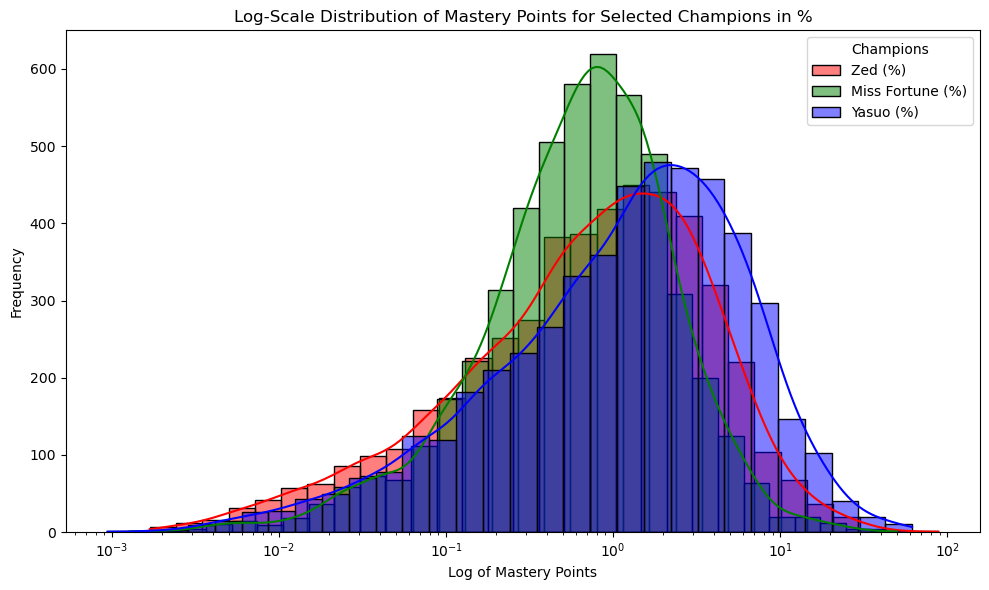

In [36]:
# Select additional champions and remove zero values for the analysis
zed_mastery = account_rank_mastery_df['Zed (%)'][account_rank_mastery_df['Zed (%)'] > 0]
miss_fortune_mastery = account_rank_mastery_df['Miss Fortune (%)'][account_rank_mastery_df['Miss Fortune (%)'] > 0]
yasuo_mastery = account_rank_mastery_df['Yasuo (%)'][account_rank_mastery_df['Yasuo (%)'] > 0]

# Creating a figure to hold the visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for Zed with log scale
sns.histplot(zed_mastery, kde=True, log_scale=True, ax=ax, color='red', label='Zed (%)', bins=30)
# Histogram for Miss Fortune with log scale
sns.histplot(miss_fortune_mastery, kde=True, log_scale=True, ax=ax, color='green', label='Miss Fortune (%)', bins=30)
# Histogram for Yasuo with log scale
sns.histplot(yasuo_mastery, kde=True, log_scale=True, ax=ax, color='blue', label='Yasuo (%)', bins=30)

# Adding title and labels
ax.set_title('Log-Scale Distribution of Mastery Points for Selected Champions in %')
ax.set_xlabel('Log of Mastery Points')
ax.set_ylabel('Frequency')

# Adding the legend
ax.legend(title='Champions')

plt.tight_layout()
plt.show()

From the Percentage Mastery Point graph it can be seen that it follows a similar pattern as the previous.

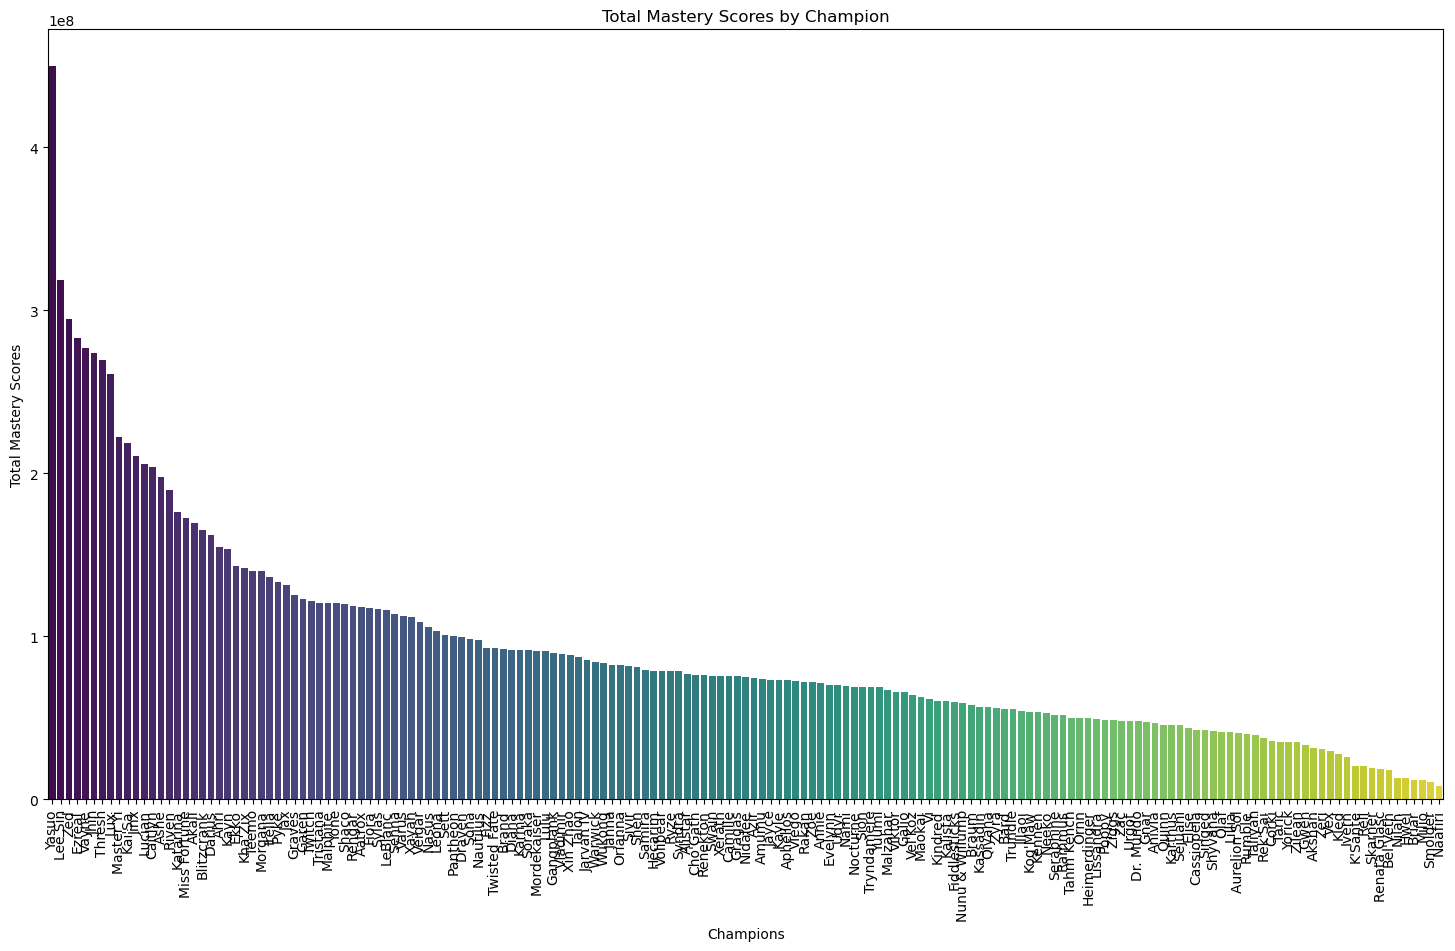

In [37]:
# Sum up mastery scores by champions (excluding rank and percentage columns)
champion_totals = account_rank_mastery_df[champion_columns].sum()

# Sort the total mastery scores for better visualization
sorted_champion_totals = champion_totals.sort_values(ascending=False)

# Generate a bar chart to compare the total mastery scores for each champion
plt.figure(figsize=(18, 10))
sns.barplot(x=sorted_champion_totals.index, y=sorted_champion_totals.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Mastery Scores by Champion')
plt.xlabel('Champions')
plt.ylabel('Total Mastery Scores')
plt.show()


In [69]:
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [71]:
# Ensure it's sorted if not already
sorted_champion_totals = sorted_champion_totals.sort_values(ascending=False)

# Select the top and bottom 20 champions
top_20_champions = sorted_champion_totals.head(20)
bottom_20_champions = sorted_champion_totals.tail(20)

# Determine the maximum total mastery score among the top 20 for consistent axis scale
max_mastery = top_20_champions.max()

# Generate horizontal bar chart for the top 20 champions
plt.figure(figsize=(10, 8))  # Adjust the size as necessary
sns.barplot(y=top_20_champions.index, x=top_20_champions.values, palette='viridis', orient='h')
plt.title('Top 20 Champions by Total Mastery Scores')
plt.xlabel('Total Mastery Scores')
plt.ylabel('Champions')
plt.xlim(0, max_mastery)  # Set the x-axis limit to the max mastery of the top 20
plt.show()

# Generate horizontal bar chart for the bottom 20 champions with the same axis limit
plt.figure(figsize=(10, 8))  # Adjust the size as necessary
sns.barplot(y=bottom_20_champions.index, x=bottom_20_champions.values, palette='viridis', orient='h')
plt.title('Bottom 20 Champions by Total Mastery Scores')
plt.xlabel('Total Mastery Scores')
plt.ylabel('Champions')
plt.xlim(0, max_mastery)  # Use the same x-axis limit as the top 20 for consistency
plt.show()



Graph set to portrait for presentation slides

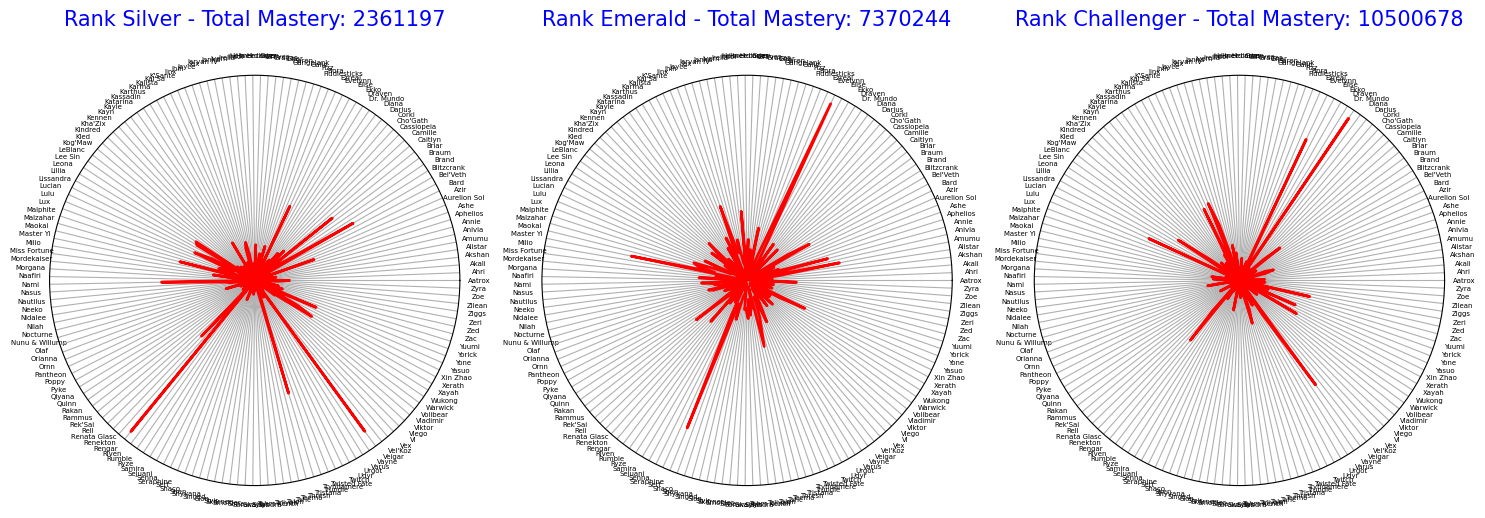

In [39]:

mastery_data = df.drop(columns='Total Mastery Score')

rank_dictionary = {2.0 : 'Silver', 6.0 : 'Emerald', 10.0: 'Challenger'}

selected_indices = [3752, 472, 1]  # Rank 2, 6, 10 respectively
selected_accounts = mastery_data.loc[selected_indices]

# Function to create a radar chart for champion masteries
def plot_full_radar_chart(data, title, ax):
    labels = data.index
    stats = data.values
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats,[stats[0]]))  # Complete the loop
    angles += angles[:1]
    ax.fill(angles, stats, color='red', alpha=0.25)
    ax.plot(angles, stats, color='red', linewidth=2)
    ax.set_yticks([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=5, rotation=45)
    ax.set_title(title, size=15, color='blue', y=1.1)

# Sort the DataFrame for visualization: Rank 2, 6, 10
selected_accounts = selected_accounts.sort_values(by='rank', ascending=True)

# Create subplots and plot each selected account
fig, axs = plt.subplots(figsize=(18, 18), nrows=1, ncols=3, subplot_kw=dict(polar=True))
fig.subplots_adjust(hspace=0.5)
for i, (idx, row) in enumerate(selected_accounts.iterrows()):
    total_mastery = row.drop('rank').sum()
    all_champions = row.drop('rank')  # All champions
    rank_name = rank_dictionary[row['rank']]
    plot_full_radar_chart(all_champions, f'Rank {rank_name} - Total Mastery: {int(total_mastery)}', axs[i])

plt.show()
